To begin, I'm importing two folders that each contains 15 books.  One set of books is translated into English from French, and the other is translated into English from German.

Here, I am getting the list of files from each folder.

In [1]:
import os
import glob

rel_path_french = os.path.join("texts/french", "*.txt")
text_files_fr = glob.glob(rel_path_french)


rel_path_german = os.path.join("texts/german", "*.txt")
text_files_ger = glob.glob(rel_path_german)

Getting the text from each file, and attaching it to a tuple with its filename.

In [2]:
import re

text_data_fr = []

for file_path in text_files_fr:
    with open(file_path, mode='r', encoding='utf-8', errors='ignore') as file_in:
        filename = os.path.basename(file_path)
        text=file_in.read().replace('\n', ' ').lstrip()
        text=re.sub(' +',' ',text)
        text_data_fr.append((text, filename))
        
text_data_ger = []

for file_path in text_files_ger:
    with open(file_path, mode='r', encoding='utf-8', errors='ignore') as file_in:
        filename = os.path.basename(file_path)
        text=file_in.read().replace('\n', ' ').lstrip()
        text=re.sub(' +',' ',text)
        text_data_ger.append((text, filename))

Importing spacy and its English model.

In [3]:
import spacy
from nltk import sent_tokenize
nlp = spacy.load("en_core_web_lg")

This function reads in a text and processes each words in the file, returning a list of words containing another list with linguisticic data about each word.

In [4]:
def parse_book(text_data, nlp):
    book_text = text_data[0]
    filename = text_data[1]
    print("Parsing text {}".format(filename))
    sentences = sent_tokenize(book_text)
    list_chunks = [sentences[x:x + 500] for x in range(0, len(sentences), 500)]
    str_chunks = [" ".join(chunk) for chunk in list_chunks]
    doc_chunks = [nlp(chunk) for chunk in str_chunks]
    word_data = [[[filename, token.text, token.lemma_, token.pos_, token.is_stop] 
                  for token in doc] 
                 for doc in doc_chunks]
    return word_data

Here, I am running both of my datasets through the parse_book() function.

In [5]:
corpus_data_fr = []

for text in text_data_fr:
    word_data = parse_book(text, nlp)
    corpus_data_fr.append(word_data)
    
corpus_data_ger = []

for text in text_data_ger:
    word_data = parse_book(text, nlp)
    corpus_data_ger.append(word_data)

Parsing text 10f.txt
Parsing text 11f.txt
Parsing text 12f.txt
Parsing text 13f.txt
Parsing text 14f.txt
Parsing text 15f.txt
Parsing text 1f.txt
Parsing text 2f.txt
Parsing text 3f.txt
Parsing text 4f.txt
Parsing text 5f.txt
Parsing text 6f.txt
Parsing text 7f.txt
Parsing text 8f.txt
Parsing text 9f.txt
Parsing text 10g.txt
Parsing text 11g.txt
Parsing text 12g.txt
Parsing text 13g.txt
Parsing text 14g.txt
Parsing text 15g.txt
Parsing text 1g.txt
Parsing text 2g.txt
Parsing text 3g.txt
Parsing text 4g.txt
Parsing text 5g.txt
Parsing text 6g.txt
Parsing text 7g.txt
Parsing text 8g.txt
Parsing text 9g.txt


This function returns the parsed data as a more accessible version of itself.

In [6]:
def flatten_lols(corpus_data):
    temp1 = [val for sublist in corpus_data for val in sublist]
    clean_data = [val for sublist in temp1 for val in sublist]
    return clean_data

In [7]:
clean_data_fr = flatten_lols(corpus_data_fr)
clean_data_ger = flatten_lols(corpus_data_ger)

This creates a dataframe of the French-langauge data, containg the filename, word, lemma, part of speech, and whether or not it is a stopword.

In [8]:
import pandas as pd

word_df_fr = pd.DataFrame(clean_data_fr, columns=['filename', 'text', 'lemma', 'pos','stop_w'])

word_df_fr

,filename,text,lemma,pos,stop_w
0,10f.txt,On,on,ADP,True
1,10f.txt,a,a,DET,True
2,10f.txt,cold,cold,ADJ,False
3,10f.txt,December,December,PROPN,False
4,10f.txt,morning,morning,NOUN,False
...,...,...,...,...,...
139255,9f.txt,day,day,NOUN,False
139256,9f.txt,at,at,ADP,True
139257,9f.txt,St.,St.,PROPN,False
139258,9f.txt,Gervais,Gervais,PROPN,False


Same as above, but for the German-language data.

In [9]:
word_df_ger = pd.DataFrame(clean_data_ger, columns=['filename', 'text', 'lemma', 'pos','stop_w'])

word_df_ger

,filename,text,lemma,pos,stop_w
0,10g.txt,﻿From,﻿From,PROPN,False
1,10g.txt,the,the,DET,True
2,10g.txt,days,day,NOUN,False
3,10g.txt,of,of,ADP,True
4,10g.txt,his,-PRON-,DET,True
...,...,...,...,...,...
136025,9g.txt,that,that,DET,True
136026,9g.txt,of,of,ADP,True
136027,9g.txt,the,the,DET,True
136028,9g.txt,other,other,ADJ,True


Here, I am removing numbers, punctuation, and stopwords.  None of these are relevent to the etymological makeup of a text, so I decided to remove them.

In [10]:
filtered_df_fr = word_df_fr[(word_df_fr['stop_w'] == False) & (word_df_fr['pos'] != 'PUNCT') & (word_df_fr['pos'] != "NUM")]
filtered_df_fr

,filename,text,lemma,pos,stop_w
2,10f.txt,cold,cold,ADJ,False
3,10f.txt,December,December,PROPN,False
4,10f.txt,morning,morning,NOUN,False
7,10f.txt,year,year,NOUN,False
11,10f.txt,young,young,ADJ,False
...,...,...,...,...,...
139247,9f.txt,wedding,wedding,NOUN,False
139252,9f.txt,place,place,NOUN,False
139255,9f.txt,day,day,NOUN,False
139257,9f.txt,St.,St.,PROPN,False


In [11]:
filtered_df_ger = word_df_ger[(word_df_ger['stop_w'] == False) & (word_df_ger['pos'] != 'PUNCT') & (word_df_ger['pos'] != "NUM")]
filtered_df_ger

,filename,text,lemma,pos,stop_w
0,10g.txt,﻿From,﻿From,PROPN,False
2,10g.txt,days,day,NOUN,False
5,10g.txt,earliest,early,ADJ,False
6,10g.txt,manhood,manhood,NOUN,False
8,10g.txt,Crammon,Crammon,PROPN,False
...,...,...,...,...,...
136014,9g.txt,glanced,glance,VERB,False
136018,9g.txt,shabby,shabby,ADJ,False
136019,9g.txt,uniform,uniform,NOUN,False
136021,9g.txt,compared,compare,VERB,False


Here, I merge the separate dataframes into one, and then I group the data by its filename.

In [12]:
merged_df = pd.concat([filtered_df_fr, filtered_df_ger])

Then, I import a csv file of the metadata associated with each book.  It contains the title, author, publishing year, and original language information.

In [13]:
rel_path2 = os.path.join("metadata.csv")
metadata_df = pd.read_csv(rel_path2)

Here, I merge the lemma dataframe and the metadata dataframe by grouping each lemma by the book it belongs to.

In [14]:
metadata_merged_df = metadata_df.set_index('filename').join(merged_df.set_index('filename'), on='filename')

final_df = metadata_merged_df.groupby(['filename', 'original_language'])['lemma'].apply(' '.join).reset_index()
final_df

,filename,original_language,lemma
0,10f.txt,F,cold December morning year young man clothing ...
1,10g.txt,G,﻿From day early manhood Crammon pilgrim path p...
2,11f.txt,F,Christmas Day year somewhat remarkable island ...
3,11g.txt,G,﻿ letter CHEVALIER BUNSEN CHARLOTTENBERG near ...
4,12f.txt,F,ass thank deliverer language approach permit c...
5,12g.txt,G,﻿ deep bohemian forest shadow remain dwell yea...
6,13f.txt,F,﻿ year ago date writing magnificently gild pai...
7,13g.txt,G,﻿It little superfluous attempt describe Rathsk...
8,14f.txt,F,﻿sentenced death week live thought freeze ghas...
9,14g.txt,G,﻿Wherein gentle reader learn life Mr. Peregrin...


Then, I export the lemmas dataframe to a csv file in order to run it through a Python script to find the etymological make-up of each book.  I could not get the code to work in Jupyter Notebook, but the script (which I slightly edited) can be found here: https://github.com/TotallyPythonic/EnglishComposition

In [130]:
lemma_csv = final_df.to_csv(index=True)
lemma_file = open("lemma.csv", "w", encoding="utf-8", errors='ignore')
lemma_file.write(lemma_csv)
lemma_file.close()

The script outputs a csv file of the percentage of Latinate and Germanic words found in each book.  The etymology data comes from https://www.etymonline.com/.  This website divides words into etymological categories including German, French, Old English, and Latin.  In my data, I've combined German and Old English words into the "Germanic" category, and French and Latin words into the "Latinate" category.

In [149]:
rel_path3 = os.path.join('percentages.csv')

percentage_df = pd.read_csv(rel_path3)

percentage_df

,filename,original_language,percent_latinate,percent_germanic
0,1f.txt,F,43.0693,49.6581
1,1g.txt,G,31.7585,57.1384
2,2f.txt,F,49.3292,44.1684
3,2g.txt,G,50.6952,42.1684
4,3f.txt,F,36.9485,48.9846
5,3g.txt,G,29.3177,56.6585
6,4f.txt,F,50.1608,43.1684
7,4g.txt,G,28.7066,59.1358
8,5f.txt,F,38.9068,47.1896
9,5g.txt,G,36.3636,58.1238


Calculating the average percentages for each language.

In [172]:
print("French averages")
averageFr = percentage_df[percentage_df['original_language'] == 'F'].mean()
print(averageFr)
print()
print("German averages")
averageGer = percentage_df[percentage_df['original_language'] == 'G'].mean()
print(averageGer)

French averages
percent_latinate    42.831053
percent_germanic    48.695960
dtype: float64

German averages
percent_latinate    34.84832
percent_germanic    53.25472
dtype: float64


Then, I plug the data into a graph based on their Latinate percentages.

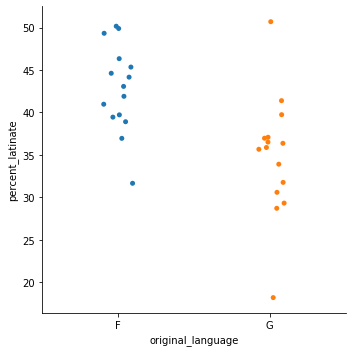

In [150]:
import seaborn as sns

sns.catplot(x = 'original_language', y = 'percent_latinate', data=percentage_df)

Same thing, but with the Germanic percentages.

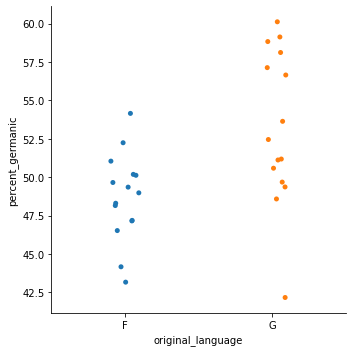

In [151]:
sns.catplot(x = 'original_language', y = 'percent_germanic', data=percentage_df)

Selecting the original language column and percent columns.

In [152]:
language = percentage_df['original_language']
percentage = percentage_df[['percent_latinate', 'percent_germanic']]

Here, I split the language and percentage columns into training and testing data.

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(percentage, language)

Here is the training data.

In [173]:
print(X_train)
print(y_train)

    percent_latinate  percent_germanic
29           35.6614           58.8360
4            36.9485           48.9846
6            50.1608           43.1684
14           31.6524           54.1582
23           41.3904           53.6423
0            43.0693           49.6581
12           41.9018           48.1563
21           18.1818           60.1235
19           39.7377           52.4568
24           45.3473           46.5269
10           49.8941           50.1867
7            28.7066           59.1358
13           35.8707           49.6846
16           39.4486           47.1568
22           46.3389           49.3561
5            29.3177           56.6585
17           33.9037           49.3684
28           40.9707           48.3070
26           44.6186           52.2466
11           37.0763           51.1238
25           36.9634           48.5864
15           36.5096           51.1858
29    G
4     F
6     F
14    F
23    G
0     F
12    F
21    G
19    G
24    F
10    F
7     G
13    G

And here is the testing data.

In [174]:
print(X_test)
print(y_test)

    percent_latinate  percent_germanic
9            36.3636           58.1238
1            31.7585           57.1384
18           39.7174           50.1268
8            38.9068           47.1896
3            50.6952           42.1684
27           30.5882           50.5883
2            49.3292           44.1684
20           44.1614           51.0489
9     G
1     G
18    F
8     F
3     G
27    G
2     F
20    F
Name: original_language, dtype: object


Fitting the data to the model and running the predictions.

In [175]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)
print(predictions)

['G' 'G' 'F' 'F' 'F' 'G' 'F' 'F']


The model succeeds in guessing a book's original language over 8/10 times.

In [176]:
from sklearn import metrics
print(metrics.accuracy_score(predictions, y_test))

0.875
